# Grover's Search Algorithm

The Grover's Search algorithm is a quantum algorithm for searching an unsorted database with N entries in $O(\sqrt{N})$ time. Classically, it would take O(N) time where we would need to search all entries in order to find the desired one. While this is only a quadratic speedup, it is quite significant when $N$ is large.

Unlike many other quantum algorithms that solve a 'blackbox' problem, the Grover's Search Algorithm solves a searching problem wherein the purpose is the locate on particular state with a measurement, out of $2^N$ possible states. While it's described as a 'searching' algorithm, a more accurate description would be 'inverting' a function. Essentially, given function $y=f(x)$, the algorithm allows us to calculate $x$ (input into database) when given $y$ (output of database).

### Algorithm:

We need to find the index of the target state among a list of $N=2^n$ elements, such that $n$ is the number of qubits and $N$ is the total size of the list. Here are the steps we need to implement to apply Grover's algorithm:

1. Prepare the qubits by putting them in uniform superposition, $|s\rangle$ by applying $H^{ \bigotimes n }|0 \rangle$.
2. Apply the Oracle $O$ to mark the target element by negating its sign such hat $O|x\rangle = -|x\rangle$.
3. Apply the Grover diffusion operator $D$ to amplify the probability amplitude of the target element.
4. Repeat steps 2-3 for about $\sqrt N$ times and then perform measurements to find the target element.

In quantum computing (unlike classical computing), the number of possible states is $2^N$ so 2 qubits = 4 states, 3 qubits = 8 states, and 4 qubits = 16 states.


## **Grover's Search for 3 Qubits**

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from math import pi

In [2]:
qubits = 3
groverCircuit = QuantumCircuit(qubits)    # initializing circuit for 3 qubits.

### **1. Superposition**

In [3]:
# applying H-gate on all qubits.
for i in range(0, qubits, 1):
    groverCircuit.h(i)

# after this process the state would be |Ψ⟩ = (1/sqrt(8))(|000⟩ + |001⟩ + |010⟩ + |100⟩ +|110⟩ + |101⟩ +|011⟩ + |111⟩).

Here we'll identify number 6, which is the state |110⟩, so we now need an oracle that flip the sign of the amplitude of this state.

### **2. Oracle**

In [4]:
# creating oracle for the state |110⟩.
def oracle_110(circuit):
    circuit.x(0)
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.h(2)
    circuit.x(0)

In [5]:
# applying the oracle to our circuit will invert |110⟩ (i.e. flip the sign of the state |110⟩).
oracle_110(groverCircuit)

#|Ψ⟩ = (1/sqrt(8))(|000⟩ + |001⟩ + |010⟩ + |100⟩ -|110⟩ + |101⟩ +|011⟩ + |111⟩).

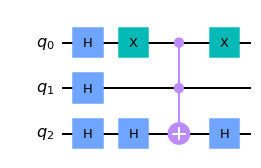

In [6]:
groverCircuit.draw(output='mpl')

### **3. Reflection (Grover Diffusion Operator)**

Since we inverted the state |110⟩ in previous step, the total mean of probabilities also shifted downwards.

So, here the Grover Diffusion Operator performs reflection about the new mean. * here by reflection we mean, inverting all the probability amplitudes about the mean.

In [7]:
def Reflection(circuit):
    for i in range(0, qubits, 1):
        circuit.h(i)
        circuit.x(i)

    # applying controlled-Z gate
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.h(2)

    for i in range(0, 3, 1):
        circuit.x(i)
        circuit.h(i)

In [8]:
# applying Reflection to our circuit.
Reflection(groverCircuit)

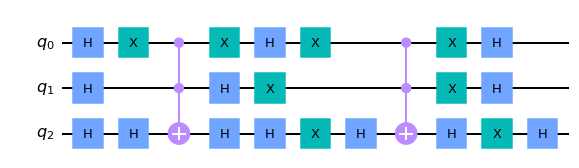

In [9]:
groverCircuit.draw(output='mpl')

After performing Reflection the amplitudes are:

$ |Ψ⟩ = (-0.18 |000⟩ -0.18 |001⟩ -0.18 |010⟩ -0.18 |100⟩ -0.88 |110⟩ -0.18 |101⟩ -0.18 |011⟩ -0.18 |111⟩) $

The amplitude of state |110⟩ is already high compared to other states, but it can be further improved by repeating the process.

### **4. Repeating Step**

In [10]:
oracle_110(groverCircuit)
Reflection(groverCircuit)

After repeating we'll get the amplitudes as:

$$|Ψ⟩ = (- 0.08 |000⟩ - 0.08 |001⟩ - 0.08 |010⟩ - 0.08 |100⟩ + 0.97 |110⟩ - 0.08 |101⟩ - 0.08 |011⟩ - 0.08 |111⟩) $$


__IMPORTANT NOTE -__

**Keep repeating this process again and again will NOT keep improving the amplitudes and will degrade the results instead of helping.**

as by repeating again we'll get the amplitudes as:

$$|Ψ⟩ = (0.3 |000⟩ + 0.3 |001⟩ + 0.3 |010⟩ + 0.3 |100⟩ - 0.57 |110⟩ + 0.3 |101⟩ + 0.3 |011⟩ + 0.3 |111⟩)$$

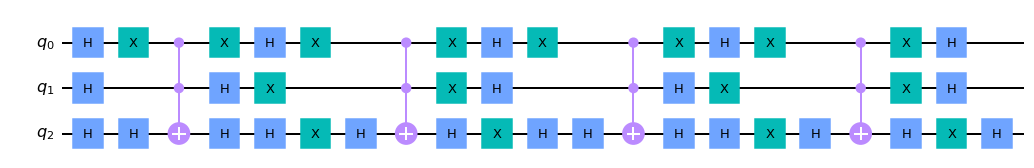

In [11]:
groverCircuit.draw(output='mpl')

### **Measurement**

We'll now execute this circuit multiple times measure the probability of getting the desired state.

In [12]:
groverCircuit.measure_all()

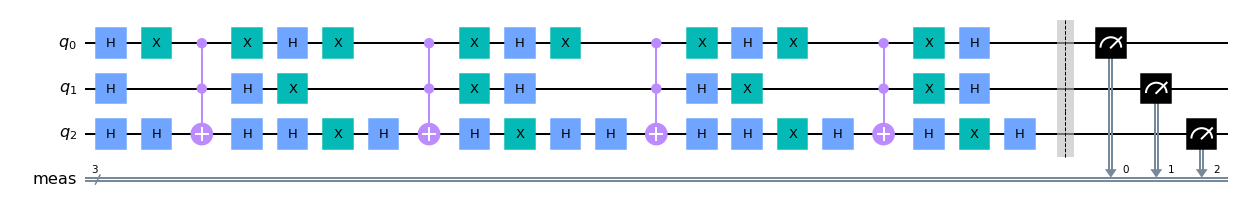

In [13]:
groverCircuit.draw(output='mpl')

**EXECUTING CIRCUIT ON SIMULATOR.**

Job Status: job has successfully run
Result: {'001': 60, '110': 7596, '100': 57, '011': 54, '111': 70, '000': 58, '010': 45, '101': 60} 



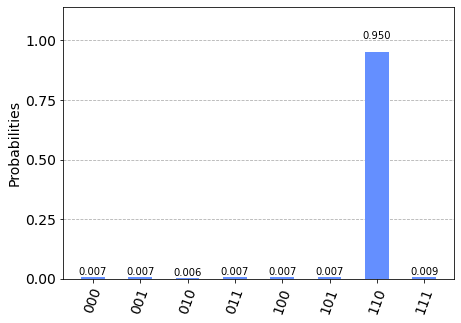

In [14]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(groverCircuit, backend=simulator, shots=8000)
job_monitor(job)

counts = job.result().get_counts()

print('Result:', counts, '\n')
plot_histogram(counts)

**EXECUTING CIRCUIT ON QUANTUM COMPUTER.**

Job Status: job has successfully run
Result: {'000': 856, '001': 749, '010': 973, '011': 831, '100': 950, '101': 558, '110': 2056, '111': 1027} 



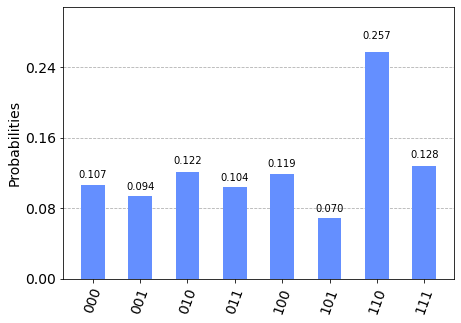

In [15]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_belem')

job = execute(groverCircuit, backend=device, shots=8000)
job_monitor(job)

counts = job.result().get_counts()

print('Result:', counts, '\n')
plot_histogram(counts)

### **Findings**

To get our desired state we only required **2** iterations, using Grover's Algorithm. Which holds for the general form $O(\sqrt{N})$. While a Classical Computer would have required $O(N/4)$ on average, which would have taken **4** iterations.

So, we saved 2 iterations where the search space had 8 possible values, and we save more iterations as the search space increases.

## **Grover's Search for 4 Qubits**

In [16]:
qubits = 4
groverCircuit = QuantumCircuit(qubits)

### **1. Superposition on all qubits**

In [17]:
for i in range(0, qubits):
    groverCircuit.h(i)

### **2. Oracle (general for all 4 qubits)**

In [18]:
def oracle(target,circuit):
    if target == "0000":
        circuit.x(0)
        circuit.x(1)
        circuit.x(2)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(1)
        circuit.x(2)
        circuit.x(3)
    elif target =="0001 ":
        circuit.x(1)
        circuit.x(2)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(1)
        circuit.x(2)
        circuit.x(3)
    
    elif target == "0010":
        circuit.x(0)
        circuit.x(2)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(2)
        circuit.x(3)
    elif target== "0011":
        circuit.x(2)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(2)
        circuit.x(3)
    elif target== "0100":
        circuit.x(0)
        circuit.x(1)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(1)
        circuit.x(3)
    elif target== "0101":
        circuit.x(1)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(1)
        circuit.x(3)
    elif target=="0110":

        circuit.x(0)
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(3)
    elif target== "0111":

        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(3)
        
    elif target== "1000":

        circuit.x(0)
        circuit.x(1)
        circuit.x(2)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(1)
        circuit.x(2)
    elif target== "1001":

        circuit.x(1)
        circuit.x(2)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(1)
        circuit.x(2)
    elif target== "1010":

        circuit.x(0)
        circuit.x(2)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(2)
    elif target== "1011":
        circuit.x(3)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(3)
    elif target=="1100":

        circuit.x(0)
        circuit.x(1)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
        circuit.x(1)
    elif target== "1101":

        circuit.x(1)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(1)
    elif target== "1110":

        circuit.x(0)

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

        circuit.x(0)
    elif target== "1111":

        circuit.cp(pi/4, 0, 3)
        circuit.cx(0, 1)
        circuit.cp(-pi/4, 1, 3)
        circuit.cx(0, 1)
        circuit.cp(pi/4, 1, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)
        circuit.cx(1, 2)
        circuit.cp(-pi/4, 2, 3)
        circuit.cx(0, 2)
        circuit.cp(pi/4, 2, 3)

### **3. Reflection**

In [19]:
def reflection(circuit):
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.x(3)

    circuit.cp(pi/4, 0, 3)
    circuit.cx(0, 1)
    circuit.cp(-pi/4, 1, 3)
    circuit.cx(0, 1)
    circuit.cp(pi/4, 1, 3)
    circuit.cx(1, 2)
    circuit.cp(-pi/4, 2, 3)
    circuit.cx(0, 2)
    circuit.cp(pi/4, 2, 3)
    circuit.cx(1, 2)

    circuit.cp(-pi/4, 2, 3)
    circuit.cx(0, 2)
    circuit.cp(pi/4, 2, 3)

    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.x(3)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)


### **4. Executing and Repeating**

**1st iteration**

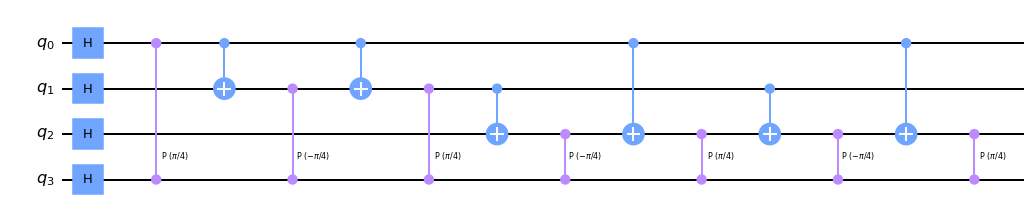

In [20]:
target = '1111'

oracle(target, groverCircuit)
groverCircuit.draw(output='mpl')

We can check whether the amplitude of the target changed or not, using the **statevector_simulator**.

In [21]:
simulator = Aer.get_backend('statevector_simulator')

result = execute(groverCircuit, backend=simulator).result()

statevectors = result.get_statevector()
print(statevectors)

[ 0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
  0.25+0.00000000e+00j  0.25+0.00000000e+00j  0.25+0.00000000e+00j
 -0.25+8.32667268e-17j]


As we can see the superposition is applied. (State Vectors tells us the state of qubits)

Next applying Reflection (Grover Diffusion Operator).

In [22]:
reflection(groverCircuit)

Checking whether the amplitude of the target state can still be improved, by performing statevector simulation.

In [23]:
simulator = Aer.get_backend('statevector_simulator')

result = execute(groverCircuit, backend=simulator).result()

statevectors = result.get_statevector()
print(statevectors)

[-0.1875-3.04033566e-17j -0.1875+6.02243901e-18j -0.1875+7.87260943e-18j
 -0.1875+2.55276679e-17j -0.1875-3.19109395e-19j -0.1875+2.22288984e-17j
 -0.1875+4.61019486e-17j -0.1875+1.92630493e-17j -0.1875-7.44122910e-18j
 -0.1875+2.49198566e-17j -0.1875+3.08347369e-17j -0.1875+2.19383353e-17j
 -0.1875+1.82633638e-18j -0.1875+2.15137498e-17j -0.1875+4.53868000e-17j
 -0.6875+2.85511647e-16j]


**2nd iteration**

In [24]:
oracle(target, groverCircuit)
reflection(groverCircuit)

In [25]:
simulator = Aer.get_backend('statevector_simulator')

result = execute(groverCircuit, backend=simulator).result()

statevectors = result.get_statevector()
print(statevectors)

[0.078125+1.54526630e-18j 0.078125+3.82076555e-17j
 0.078125+2.52686660e-17j 0.078125+1.90890823e-17j
 0.078125+1.89862216e-17j 0.078125+4.02815689e-17j
 0.078125+6.26127218e-17j 0.078125+6.40282236e-17j
 0.078125+1.49398407e-17j 0.078125+4.34343451e-17j
 0.078125+6.33396547e-17j 0.078125+5.60077885e-17j
 0.078125+3.05544596e-17j 0.078125+1.10635672e-16j
 0.078125+1.09093775e-16j 0.953125-7.66988697e-16j]


**3rd iteration**

In [26]:
oracle(target, groverCircuit)
reflection(groverCircuit)

In [27]:
simulator = Aer.get_backend('statevector_simulator')

result = execute(groverCircuit, backend=simulator).result()

statevectors = result.get_statevector()
print(statevectors)

[ 0.05078125-1.88628235e-16j  0.05078125-1.43007394e-16j
  0.05078125-1.63222022e-16j  0.05078125-1.62686447e-16j
  0.05078125-1.85436165e-16j  0.05078125-1.74075006e-16j
  0.05078125-1.65880158e-16j  0.05078125-2.39787988e-16j
  0.05078125-1.81452570e-16j  0.05078125-1.51476746e-16j
  0.05078125-1.39198447e-16j  0.05078125-1.88966723e-16j
  0.05078125-1.55130145e-16j  0.05078125-1.72699032e-16j
  0.05078125-1.86835338e-16j -0.98046875+1.06040601e-15j]


We can see the amplitude after the third iteration is very high. If we again iterate then the amplitude will drop.

**Measurement**

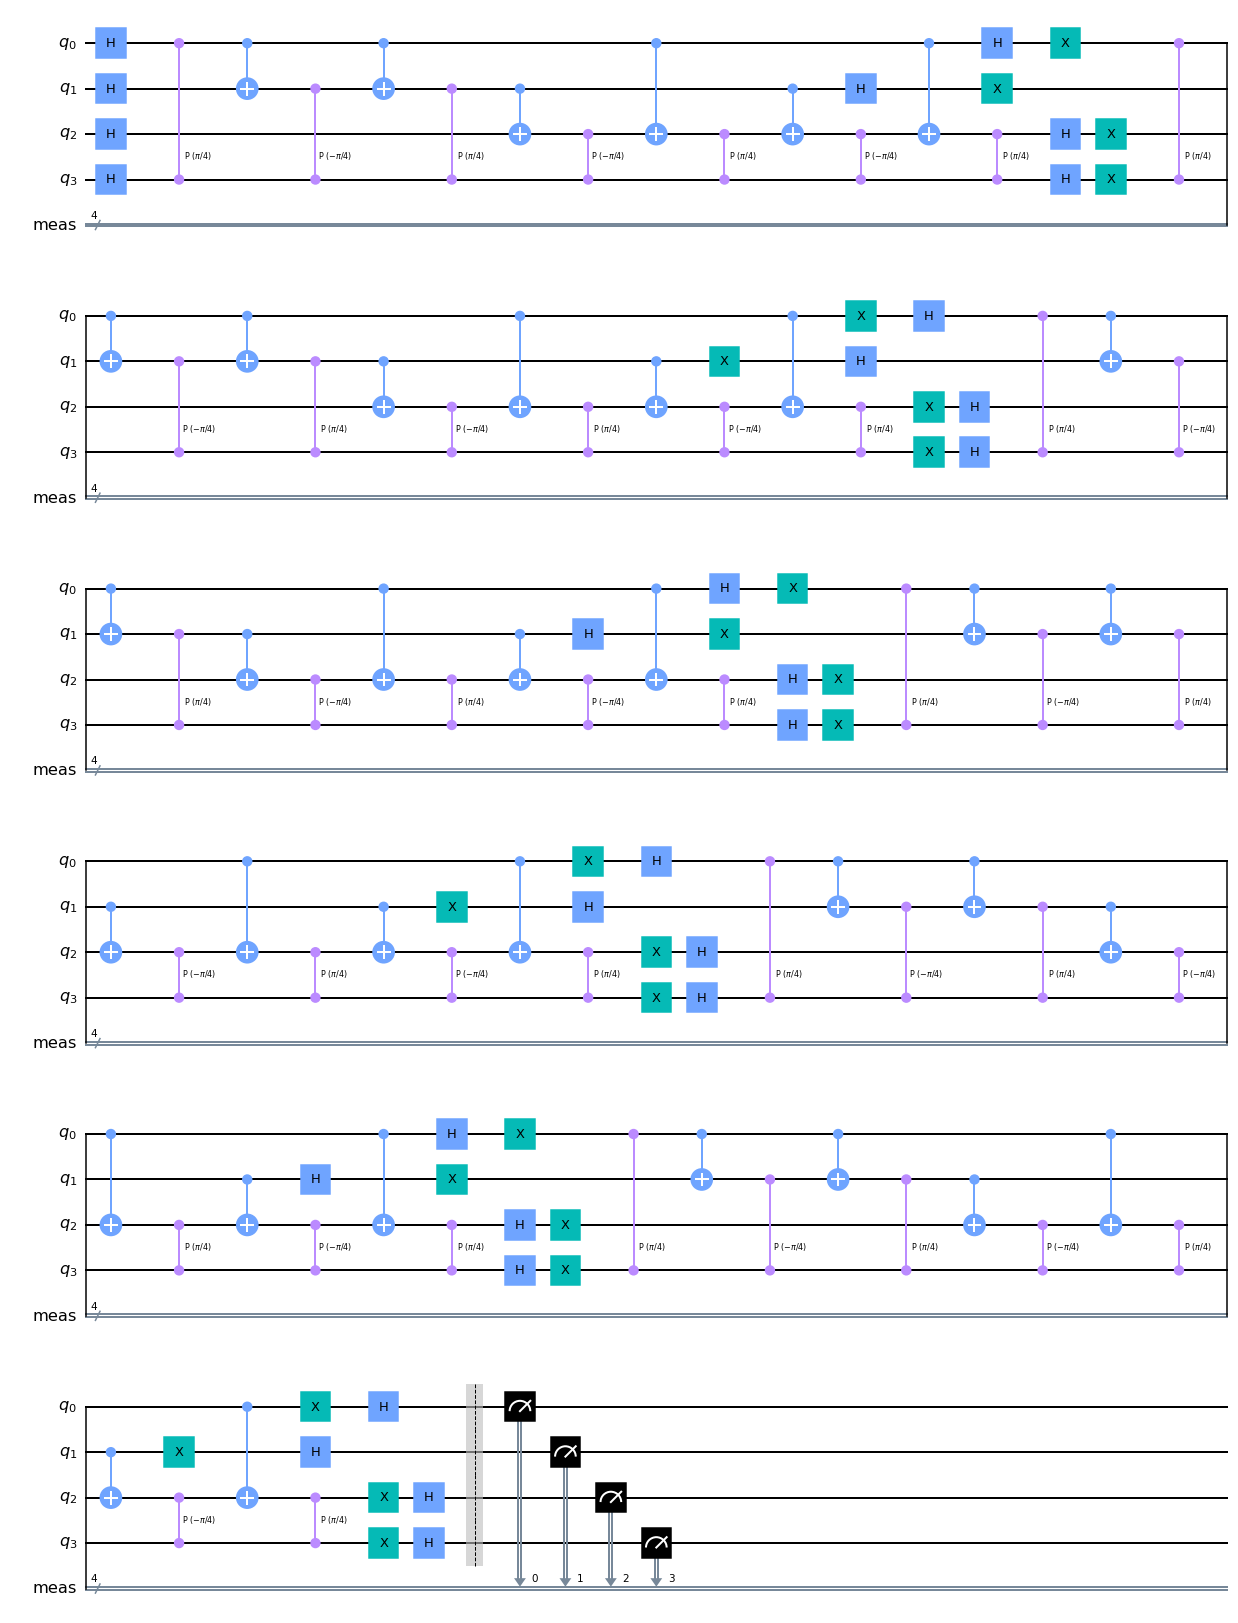

In [28]:
groverCircuit.measure_all()
groverCircuit.draw(output='mpl')

**EXECUTING CIRCUIT ON SIMULATOR.**

Job Status: job has successfully run
Result: {'1000': 23, '0010': 24, '1001': 23, '1110': 22, '0101': 20, '1111': 7657, '1101': 19, '1010': 22, '1011': 25, '0000': 30, '0110': 24, '0011': 18, '0001': 20, '0100': 23, '1100': 30, '0111': 20} 



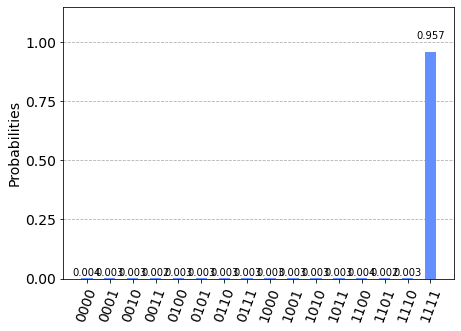

In [29]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(groverCircuit, backend=simulator, shots=8000)
job_monitor(job)

counts = job.result().get_counts()

print('Result:', counts, '\n')
plot_histogram(counts)

So, we identified the target in 3 iterations only, whereas on a Classical Computer we would on average require 8 iterations.

**EXECUTING CIRCUIT ON QUANTUM COMPUTER.**

Job Status: job has successfully run
Result: {'0000': 516, '0001': 538, '0010': 457, '0011': 504, '0100': 499, '0101': 507, '0110': 389, '0111': 477, '1000': 547, '1001': 607, '1010': 473, '1011': 508, '1100': 468, '1101': 557, '1110': 443, '1111': 510} 



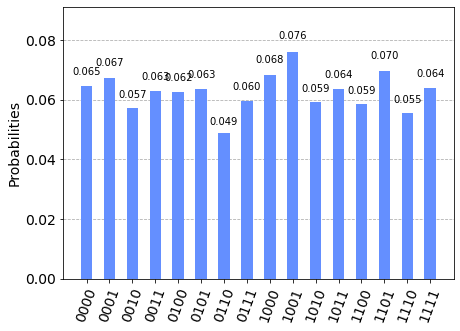

In [30]:
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_belem')

job = execute(groverCircuit, backend=device, shots=8000)
job_monitor(job)

counts = job.result().get_counts()

print('Result:', counts, '\n')
plot_histogram(counts)

NOTE - Because of the NOISE, we are getting undersirable results, but as the Quantum Computers improve, so will our results. As shown by the simulation results.